In [1]:
import pandas as pd
from collections import namedtuple
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
# Define a namedtuple to represent each image
Image = namedtuple('Image', ['file_path', 'label'])

# Define the root folder and the subfolders
root_folder = Path('/kaggle/input/chest-xray-pneumonia/chest_xray/')
subfolders = ['train', 'test', 'val']

# Create empty lists to hold the images
train_images = []
val_images = []
test_images = []

# Loop through the subfolders and the image files
for i, subfolder in enumerate(subfolders):
    folder_path = root_folder / subfolder
    for label_path in folder_path.iterdir():
        for file_path in label_path.iterdir():
            # Create an Image namedtuple and append it to the appropriate list
            label = 0 if label_path.name == "NORMAL" else 1
            img = Image(file_path, label)
            if subfolder == 'train':
                train_images.append(img)
            elif subfolder == "val":
                val_images.append(img)
            else:
                test_images.append(img)

In [3]:
# Convert the lists of images to dataframes
train_df = pd.DataFrame(train_images, columns=['file_path', 'label'])
val_df = pd.DataFrame(val_images, columns=['file_path', 'label'])
test_df = pd.DataFrame(test_images, columns=['file_path', 'label'])

In [4]:
def show_image_with_label(image_path, label):
    """
    Displays a single .jpg image with a label.

    Args:
    image_path (str): Path to the .jpg image file.
    label (str): The label to be displayed (e.g. "Pneumonia" or "Normal").
    """
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap="gray")
    plt.title(label)
    plt.axis('off')
    plt.show()

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_images_with_labels(image_paths, labels, rows, cols):
    """
    Displays multiple .jpg images with labels in a grid.

    Args:
    image_paths (list): List of paths to the .jpg image files.
    labels (list): List of labels to be displayed for each image.
    rows (int): Number of rows in the grid.
    cols (int): Number of columns in the grid.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(15,15))
    for i, ax in enumerate(axes.flat):
        img = mpimg.imread(image_paths[i])
        ax.imshow(img, cmap='gray')
        ax.set_title(labels[i])
        ax.axis('off')
    plt.show()


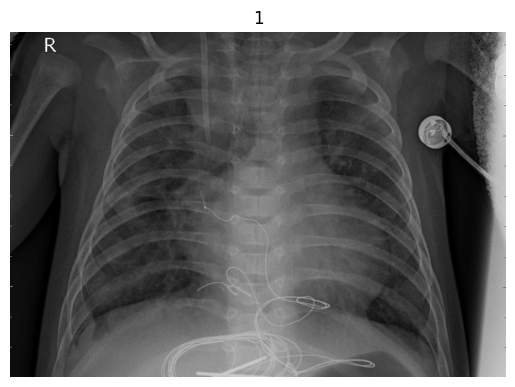

In [14]:
show_image_with_label(train_df[:1]["file_path"][0], train_df[:1]["label"][0])

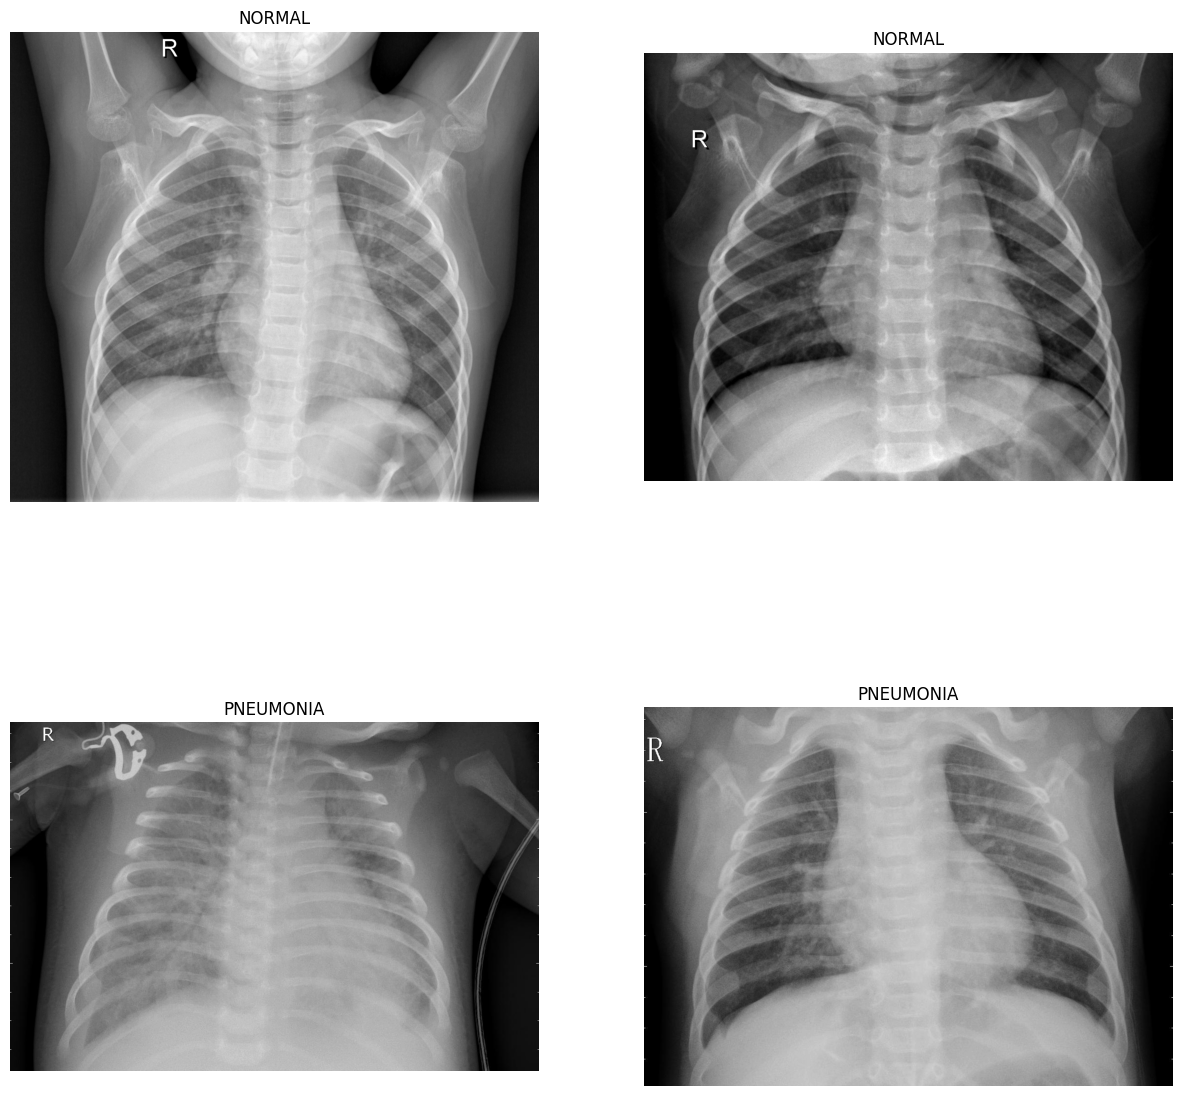

In [15]:
image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg"
]
labels = [
    "NORMAL",
    "NORMAL",
    "PNEUMONIA",
    "PNEUMONIA"
]
show_images_with_labels(image_paths, labels, rows=2, cols=2)

In [16]:
train_df["label"].value_counts(normalize=True)

1    0.742906
0    0.257094
Name: label, dtype: float64

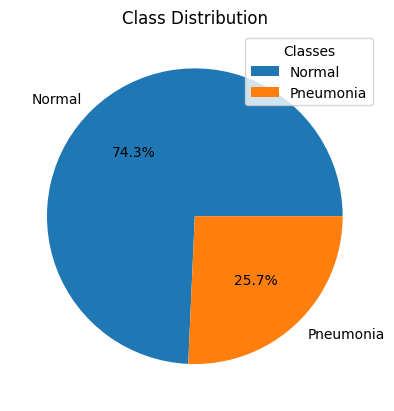

In [17]:
# Plot class distribution
class_counts = train_df["label"].value_counts()
labels = ["Normal", "Pneumonia"]
plt.pie(class_counts, labels=labels, autopct='%1.1f%%')
plt.title("Class Distribution")
plt.legend(title="Classes", labels=labels)
plt.show()
